### Day 8: Introduction to Linear Programming
Linear programming (LP) is a method to optimize a linear objective function, subject to linear equality and inequality constraints. In most LP problems, the goal is either to maximize profit or minimize cost.

Lesson
Problem Statement (Guided Example)
We want to maximize the profit function:

P(x,y)=3x+5y,

subject to:

Constraint 1: 
2x+3y≤12

Constraint 2: 
x+2y≤8

Nonnegativity: 
x≥0, y≥0

Since linprog in SciPy is designed to minimize an objective function, we convert our maximization problem into a minimization problem by minimizing the negative of the profit:

Minimize f(x,y)=−3x−5y.

In [7]:
import numpy as np
from scipy.optimize import linprog

In [8]:
# Define the coefficients for the objective function.

c = [-3, -5]

In [9]:
# Define the constraints in matrix form of Ax <= b

A = [
    [2, 3],
    [1, 2]
]

b = [12, 8]

In [10]:
# Solve the linear program with linprog

result = linprog(
    c,
    A_ub=A,
    b_ub=b,
    bounds=[(0, None), (0, None)], # Non-negativity constraint
    method='highs' # LP Solver method 
)

In [11]:
print('The optimal solution was', result.x)
print('The minimized objective value was', result.fun)

The optimal solution was [0. 4.]
The minimized objective value was -20.0


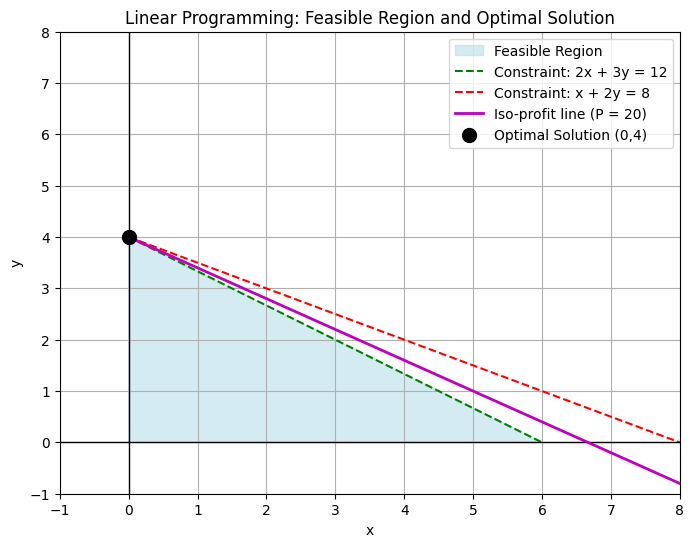

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define vertices of the feasible region (the intersection of all constraints)
vertices = np.array([[0, 0], [6, 0], [0, 4]])

# Create figure and axis
plt.figure(figsize=(8, 6))

# Plot the feasible region as a polygon
feasible_region = plt.Polygon(vertices, color='lightblue', alpha=0.5, label='Feasible Region')
plt.gca().add_patch(feasible_region)

# Plot the constraint lines:
# Constraint 1: 2x + 3y = 12  =>  y = (12 - 2x)/3
x_vals1 = np.linspace(0, 6, 200)
y_vals1 = (12 - 2*x_vals1) / 3
plt.plot(x_vals1, y_vals1, 'g--', label='Constraint: 2x + 3y = 12')

# Constraint 2: x + 2y = 8  =>  y = (8 - x)/2
x_vals2 = np.linspace(0, 8, 200)
y_vals2 = (8 - x_vals2) / 2
plt.plot(x_vals2, y_vals2, 'r--', label='Constraint: x + 2y = 8')

# Plot nonnegativity axes
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)

# Plot an iso-profit line for P(x,y)=3x+5y. We know the optimal profit is 20 at (0,4).
# Iso-profit line for P=20: 3x + 5y = 20  =>  y = (20 - 3x)/5
x_iso = np.linspace(0, 8, 200)
y_iso = (20 - 3*x_iso) / 5
plt.plot(x_iso, y_iso, 'm-', linewidth=2, label='Iso-profit line (P = 20)')

# Mark the optimal solution (0, 4)
plt.scatter([0], [4], color='black', s=100, zorder=5, label='Optimal Solution (0,4)')

# Set axis limits and labels
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Programming: Feasible Region and Optimal Solution')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()